<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Optimal stopping - secretary problem



# Optimal stopping
<hr style = "border:2px solid black" ></hr>


- The secretary problem is a hypothetical question regarding how best to choose a candidate for a job position. 

- In short, a known number of candidates are interviewed one at a time in a random order to fill one position. 

- The interviewer knows nothing about the abilities of the candidates to come but can rank those that have been seen from best to worst. 
    
- After each interview, the candidate is either rejected or accepted and this decision is final. 
    
- The solution to this problem will **maximise the probability** of selecting the best candidate.

- The **optimal solution** is to reject the first `n/e` applicants (`e ~ 2.718`) and choose the first candidate who is better than the best candidate from the n/e rejected candidates. If there is no candidate who is better then choose the last candidate.
    


# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Optimal strategy
<hr style = "border:2px solid black" ></hr>

In [2]:
def choose_candidate(n):
    '''Choose a candidate from a list of n candidates using
    the optimal strategy.'''

    candidates = np.arange(1, n+1)
    
    # simulate random order of candidates being interviewed
    np.random.shuffle(candidates)
    
    # For our n candidates we reject the first int(round(n/np.e)) candidates. 
    stop = int(round(n/np.e))
    
    # The best candidate from this list will be the minimum value (since lower is better)
    best_from_rejected = np.min(candidates[:stop])
    rest = candidates[stop:]
    
    """
    The last line will return an error if there is no candidate in rest who is better 
    than best_from_rejected. Hence we catch this error and return the last candidate.
    """
    try:
        return rest[rest < best_from_rejected][0]
    except IndexError:
        return candidates[-1]

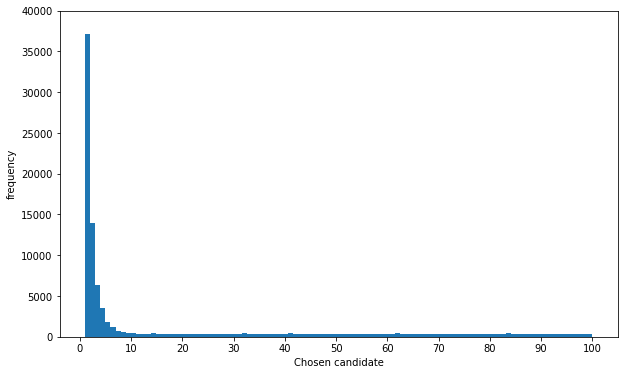

In [3]:
# choose from 100 candidates and run simulation 100,000 times
sim = np.array([choose_candidate(n=100) for i in range(100000)])

plt.figure(figsize=(10, 6))
plt.hist(sim, bins=100)
plt.xticks(np.arange(0, 101, 10))
plt.ylim(0, 40000)
plt.xlabel('Chosen candidate')
plt.ylabel('frequency')
plt.show()



- We can see that candidate no. 1 is chosen most often. 
    
- In fact the distribution is heavily skewed towards the best few candidates, so even if you don't get the very best there is a high chance you will select one of the top 10% of candidates. 
    
- This is further illustrated by the plotting the cumulative density function of this distribution.
    


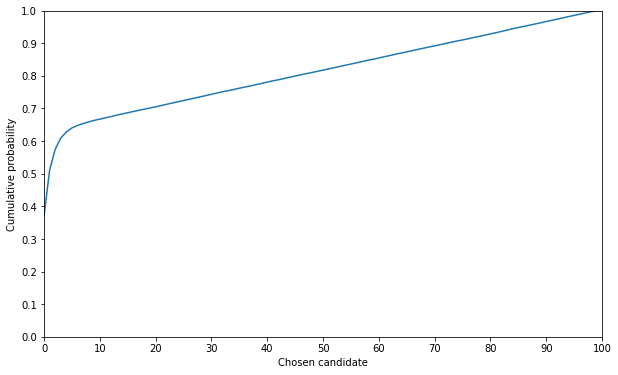

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(np.histogram(sim, bins=100)[0])/100000)
plt.ylim(0,1)
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('Chosen candidate')
plt.ylabel('Cumulative probability')
plt.show()


- The probability of choosing one of the best candidates rises very quickly up to about the 10th candidate before increasing in a **linear fashion**.

- The rate of change o this plot is telling us how efficient we are going to be in our search. In the early search we are very efficient as the curve has an exponential growth, then the rate is constant, which means we improve in a linear fashion.



# Different strategy - non optimal
<hr style = "border:2px solid black" ></hr>


- Let's now see if we are likely to choose the best candidate with a different strategy. Instead of rejecting the first 36.8% (1/e) of candidates, we can reject the first 10%, 20%, 40%, 50% etc. of candidates.

- By adjusting our `choose_candidate` function we can add an argument to specify the proportion of candidates we initially reject.



In [5]:
def choose_candidate(n, reject=np.e):
    '''Choose a candidate from a list of n candidates using
    a specified strategy.

    reject: percentage of candidates to initially reject (optimal strategy by default)
    '''

    candidates = np.arange(1, n+1)
    np.random.shuffle(candidates)

    if reject == np.e:
        stop = int(round(n/reject))
    else:
        stop = int(round(reject*n/100))

    best_from_rejected = np.min(candidates[:stop])
    rest = candidates[stop:]

    try:
        return rest[rest < best_from_rejected][0]
    except IndexError:
        return candidates[-1]


- Let's now plot the probability of choosing the best candidate (i.e. candidate no. 1) by the percentage of candidates rejected.
    
- As we would expect the optimal strategy is somewhere in between 35% and 40% i.e. `1/e`. The probability of choosing the best candidate when we reject the first n/e candidates also happens to be `1/e`.



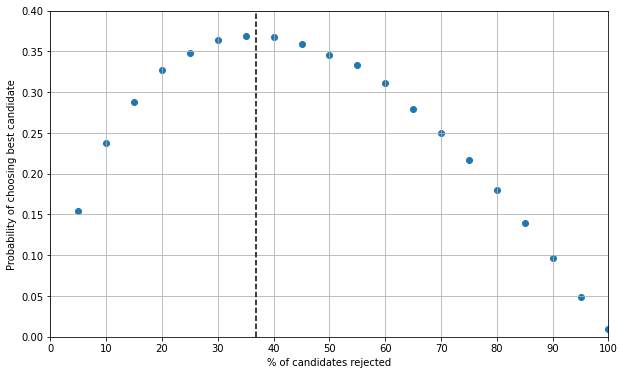

In [6]:
best_candidate = []
for r in range(5, 101, 5):
    sim = np.array([choose_candidate(n=100, reject=r) for i in range(100000)])
    # np.histogram counts frequency of each candidate
    best_candidate.append(np.histogram(sim, bins=100)[0][0]/100000)

plt.figure(figsize=(10, 6))
plt.scatter(range(5, 101, 5), best_candidate)
plt.xlim(0, 100)
plt.xticks(np.arange(0, 101, 10))
plt.ylim(0, 0.4)
plt.xlabel('% of candidates rejected')
plt.ylabel('Probability of choosing best candidate')
plt.grid(True)
plt.axvline(100/np.e, ls='--', c='black')
plt.show()


# Pratical approach
<hr style = "border:2px solid black" ></hr>


- As hiring managers may be content with selecting one of the best **rather than** the very best candidate.

- Let's see what our optimal rejection strategy should be given we want the best 1, 2, 5, or 10 candidates out of 100.



In [7]:
def get_best_candidates(best_n=1):
    '''Return a list of probabilities for different rejection strategies and specify what percentage of the
    best candidates we want to select.'''

    best_candidate = []
    for c in [1] + list(range(5, 101, 5)):
        sim = np.array([choose_candidate(100, reject=c) for i in range(10000)])
        best_candidate.append(len(sim[sim <= best_n])/100)

    return best_candidate

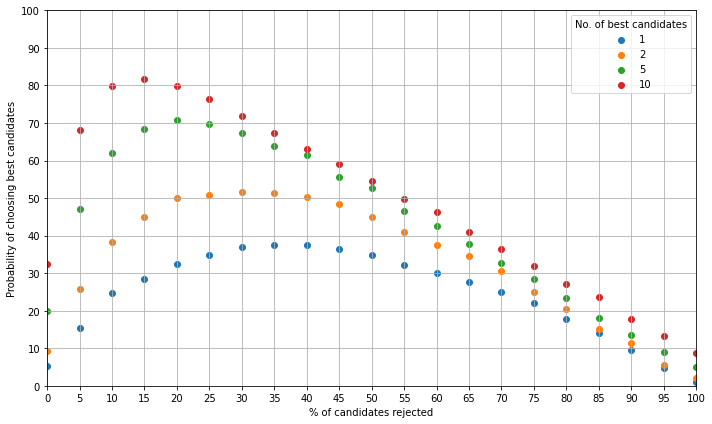

In [8]:
plt.figure(figsize=(10, 6))
for i in [1, 2, 5, 10]:
    plt.scatter(list(range(0, 101, 5)), get_best_candidates(i), label=str(i))

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 101, 5))
plt.yticks(np.arange(0, 101, 10))
plt.xlabel('% of candidates rejected')
plt.ylabel('Probability of choosing best candidates')
plt.legend(title='No. of best candidates')
plt.grid(True)
plt.tight_layout()
plt.show()


- The blue curve is as before i.e. when we want the one best candidate. 

- If we wanted one of the best 2 candidates, the optimal strategy is to reject the first 30% of candidates which will give us a greater than evens chance of getting what we want. 
    
- For the best 5 and 10 candidates we can increase that probaility to 70% and over 80% respectively by using the optimal strategy.



# References
<hr style = "border:2px solid black" ></hr>


- [Original python code](http://www.imrankhan.dev/pages/Solving%20the%20secretary%20problem%20with%20Python.html)
- [CORRECTING FOR SELECTION BIAS, BACKTEST OVERFITTING AND NON-NORMALITY](https://www.davidhbailey.com/dhbpapers/deflated-sharpe.pdf)
- [The secretary problem](https://en.wikipedia.org/wiki/Secretary_problem)

